In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load in and clean up data

In [2]:
#Loading in the data. Using the idea Mary shared on Slack to limit myself to 200,000 rows
data = pd.read_csv("train.csv", nrows = 200000)
data

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2013-03-06 18:11:28,40,3,66,467,18259,1360.0809,740408,0,0,...,0,1,8881,6,0,4,2,50,1633,55
199996,2013-03-06 19:04:49,40,3,66,467,18259,1360.1294,740408,0,0,...,0,1,8881,6,1,1,2,50,1633,13
199997,2013-03-23 08:21:59,40,3,66,467,30406,NaN,740408,0,0,...,0,1,8261,1,0,9,2,50,646,48
199998,2013-03-23 08:39:41,40,3,66,467,30406,NaN,740408,0,0,...,0,1,8261,1,0,4,2,50,646,91


In [3]:
#Using describe to look at the numbers
data.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,130363.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,8.902020,2.657040,85.249490,315.726450,27965.756295,1953.335631,380280.016485,0.136000,0.255325,5.81500,...,0.328000,1.116885,14591.808115,2.603865,0.083345,1.480630,3.176690,80.292910,601.35258,49.637945
std,11.909226,0.752855,54.458165,209.417337,16792.147285,2193.421104,212464.047443,0.342789,0.436045,3.75299,...,0.723387,0.457574,11047.396255,2.165358,0.276404,1.202889,1.628104,55.634115,509.62625,28.985590
min,2.000000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,13442.000000,306.000350,181983.000000,0.000000,0.000000,2.00000,...,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,180.00000,25.000000
50%,2.000000,3.000000,66.000000,314.000000,27655.000000,1123.419100,391007.000000,0.000000,0.000000,9.00000,...,0.000000,1.000000,11319.000000,1.000000,0.000000,1.000000,2.000000,50.000000,599.00000,49.000000
75%,11.000000,3.000000,69.000000,395.000000,42931.000000,2568.067150,574353.000000,0.000000,1.000000,9.00000,...,0.000000,1.000000,19352.000000,5.000000,0.000000,2.000000,4.000000,105.000000,701.00000,73.000000
max,53.000000,4.000000,239.000000,1025.000000,56498.000000,11641.224200,740408.000000,1.000000,1.000000,10.00000,...,9.000000,8.000000,65035.000000,9.000000,1.000000,59.000000,6.000000,212.000000,2117.00000,99.000000


```
Using describe I can see the mean, standard deviation minimum, maximum, and percentile. Even by limiting the number of rows I've pulled in there is still quite a bit of data, so I may try looking into some subsets to start with before splitting the data.
```

In [4]:
#First I want to start with looking for null values before doing any subsets, so I can address those depending on what I find.
data.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    69637
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        177
srch_co                        177
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

```
So looking at the null values I have 3 columns with missing values.
orig_destination_distance - Which is the physical distance between a hotel and a customer at the time of search. I don't think this is really important to keep
srch_ci - check in date
srch_co - check out date
I don't believe I'll need any of these moving forward so I'm going to drop those as well as date_time. I'm going to drop date_time because I don't think it's necessary to keep and can mess me up later (went back and did this as it did cause problems).
```

In [5]:
#Going to drop columns with null values
data = data.drop(['orig_destination_distance', 'srch_ci', 'srch_co', 'date_time'], axis = 1)
data

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2,3,66,348,48862,12,0,1,9,2,0,1,8250,1,0,3,2,50,628,1
1,2,3,66,348,48862,12,0,1,9,2,0,1,8250,1,1,1,2,50,628,1
2,2,3,66,348,48862,12,0,0,9,2,0,1,8250,1,0,1,2,50,628,1
3,2,3,66,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,80
4,2,3,66,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,40,3,66,467,18259,740408,0,0,9,2,0,1,8881,6,0,4,2,50,1633,55
199996,40,3,66,467,18259,740408,0,0,9,2,0,1,8881,6,1,1,2,50,1633,13
199997,40,3,66,467,30406,740408,0,0,9,2,0,1,8261,1,0,9,2,50,646,48
199998,40,3,66,467,30406,740408,0,0,9,2,0,1,8261,1,0,4,2,50,646,91


In [6]:
#Noticed that the user location country code was 66, so decided to subset train data based off of that
data = data[data['user_location_country'] == 66]
data.tail()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
199995,40,3,66,467,18259,740408,0,0,9,2,0,1,8881,6,0,4,2,50,1633,55
199996,40,3,66,467,18259,740408,0,0,9,2,0,1,8881,6,1,1,2,50,1633,13
199997,40,3,66,467,30406,740408,0,0,9,2,0,1,8261,1,0,9,2,50,646,48
199998,40,3,66,467,30406,740408,0,0,9,2,0,1,8261,1,0,4,2,50,646,91
199999,40,3,66,467,30406,740408,0,0,9,2,0,1,8261,1,0,4,2,50,646,94


In [7]:
#Now that the data is subset based on user_location_country I actually don't need to keep that column, so I'm going to drop it
data = data.drop(['user_location_country'], axis = 1)
data.head()

,site_name,posa_continent,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2,3,348,48862,12,0,1,9,2,0,1,8250,1,0,3,2,50,628,1
1,2,3,348,48862,12,0,1,9,2,0,1,8250,1,1,1,2,50,628,1
2,2,3,348,48862,12,0,0,9,2,0,1,8250,1,0,1,2,50,628,1
3,2,3,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,80
4,2,3,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,21


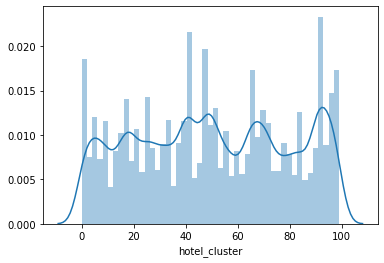

In [8]:
#Looking at hotel_cluster
sns.distplot(data['hotel_cluster'])

In [9]:
#Verifying the number of hotel clusters from the visual
data['hotel_cluster'].nunique()

100

```
Here we can see there are 100 unique hotel clusters. I want to look at value counts for each cluster.
```

In [10]:
#Looking at hotel cluster value counts. I wanted to see all of them so I took this idea from Jolene Branch as she showed me how she did it.
pd.set_option('display.max_rows', None, 'display.max_columns', None)
data['hotel_cluster'].value_counts()

91    4664
48    3089
41    2942
65    2928
42    2249
18    2192
95    1940
72    1867
70    1855
21    1845
50    1835
98    1821
28    1817
83    1813
1     1801
26    1774
68    1761
52    1723
25    1661
47    1633
37    1629
5     1628
16    1592
96    1589
59    1567
0     1566
9     1514
33    1507
77    1503
64    1416
51    1416
39    1394
40    1386
55    1347
90    1317
13    1313
4     1299
94    1297
97    1292
73    1292
34    1289
6     1273
10    1254
66    1236
54    1225
69    1218
84    1209
17    1174
56    1156
32    1142
79    1124
19    1110
2     1099
99    1043
31    1021
58     971
76     963
7      945
92     931
87     928
45     877
30     872
15     872
71     863
23     853
49     839
93     827
62     826
8      818
82     813
46     777
11     769
80     760
89     729
22     724
36     693
78     670
44     657
14     647
85     613
20     601
86     579
67     577
29     571
43     571
24     553
38     547
61     516
3      510
81     499
63     466

```
At this point there is probably quite a bit more I could do to clean up and refine my data. However, since this week has been rather tough with some health problems and a procedure I just don't have the time I'd like to spend doing this. So at this point I'm going to go ahead and split my data and start looking at predictions.
```

## Split data and start working on predictions

In [27]:
#Going to do something similar to what we've been doing on our term project as well as some assistance from Jolene
data['Target_Label'] = (data.is_booking == '1').astype(int)

In [28]:
num_col_names = ['srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt', 'is_booking']

In [29]:
cat_col_names = ['site_name', 
                 'posa_continent', 
                'user_location_region',
                'user_location_city', 
                'user_id',
                'is_mobile',
                'is_package',
                'channel',
                'srch_destination_id',
                'srch_destination_type_id',
                 'is_booking',
                'hotel_continent',
                'hotel_country',
                'hotel_market',
                'hotel_cluster']

#Get the top 10 hotel clusters
top_10_spec = list(data['hotel_cluster'].value_counts(dropna=False)[0:10].index)

#New cluster column for the top 10
data['hotel_cluster_new'] = data['hotel_cluster'].copy()

#Replace values with "other" if they're not in the top 10
data.loc[~data.hotel_cluster_new.isin(top_10_spec), 'hotel_cluster_new'] = 'Other'

#Create categorical predictors dataframe
data_cat = pd.get_dummies(data[cat_col_names + ['hotel_cluster_new']], drop_first = True)

#Look at the new categorical predictors dataframe
data_cat.head()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [13]:
#Add Categorical predictor variables to the main dataframe
data = pd.concat([data, data_cat], axis = 1)

#Retain columns of the data_cat
data_cat_cols = list(data_cat.columns)

data.head()

,site_name,posa_continent,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,Target_label,hotel_cluster_new,site_name,posa_continent,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_cluster_new_21,hotel_cluster_new_41,hotel_cluster_new_42,hotel_cluster_new_48,hotel_cluster_new_65,hotel_cluster_new_70,hotel_cluster_new_72,hotel_cluster_new_91,hotel_cluster_new_95,hotel_cluster_new_Other
0,2,3,348,48862,12,0,1,9,2,0,1,8250,1,0,3,2,50,628,1,0,Other,2,3,348,48862,12,0,1,9,8250,1,2,50,628,1,0,0,0,0,0,0,0,0,0,1
1,2,3,348,48862,12,0,1,9,2,0,1,8250,1,1,1,2,50,628,1,0,Other,2,3,348,48862,12,0,1,9,8250,1,2,50,628,1,0,0,0,0,0,0,0,0,0,1
2,2,3,348,48862,12,0,0,9,2,0,1,8250,1,0,1,2,50,628,1,0,Other,2,3,348,48862,12,0,0,9,8250,1,2,50,628,1,0,0,0,0,0,0,0,0,0,1
3,2,3,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,80,0,Other,2,3,442,35390,93,0,0,3,14984,1,2,50,1457,80,0,0,0,0,0,0,0,0,0,1
4,2,3,442,35390,93,0,0,3,2,0,1,14984,1,0,1,2,50,1457,21,0,21,2,3,442,35390,93,0,0,3,14984,1,2,50,1457,21,1,0,0,0,0,0,0,0,0,0


In [15]:
#Looking at a summary of variables for modeling
print('Total # of predictors is', len(num_col_names + data_cat_cols))
print('Numeric predictors:', len(num_col_names))
print('Categorical predictors', len(data_cat_cols))

Total # of predictors is 28
Numeric predictors: 4
Categorical predictors 24


In [22]:
#Create dataframe for modeling
model_data = data[num_col_names + data_cat_cols + ['Target_Label']]

#Shuffle the data
model_data = model_data.sample(n=len(model_data),random_state=10)
model_data = model_data.reset_index(drop=True)

# 15% Validation / 15% Test split / 70% Train
vd_test = model_data.sample(frac=0.3, random_state=10)
test_data = vd_test.sample(frac=0.5, random_state=10)
vd_data = vd_test.drop(test_data.index)
train_data = model_data.drop(vd_test.index)

#Print out booking rates by set
print('Hotel Booking Rates by Set')
print('Test: ', test_data[test_data['Target_Label']==1].shape[0]/test_data.shape[0])
print('Validation: ', vd_data[vd_data['Target_Label']==1].shape[0]/vd_data.shape[0])
print('Train: ', train_data[train_data['Target_Label']==1].shape[0]/train_data.shape[0])

Hotel Booking Rates by Set
Test:  0.0
Validation:  0.0
Train:  0.0


In [23]:
# Split training data into positive and negative
positive = train_data.Target_Label == 1
train_data_pos = train_data.loc[positive]
train_data_neg = train_data.loc[~positive]

# Merge and Balance
train_data_balanced = pd.concat([train_data_pos, train_data_neg.sample(n = len(train_data_pos), random_state=10)], axis = 0)

# Shuffle
train_data_balanced = train_data_balanced.sample(n = len(train_data_balanced), random_state = 10).reset_index(drop=True)

print('Readmission Rates by Set')
print('Test: ', test_data[test_data['Target_Label']==1].shape[0]/test_data.shape[0])
print('Validation: ', vd_data[vd_data['Target_Label']==1].shape[0]/vd_data.shape[0])
print('Train: ', train_data[train_data['Target_Label']==1].shape[0]/train_data.shape[0])
print('Train Balanced: ', train_data_balanced[train_data_balanced['Target_Label']==1].shape[0]/train_data_balanced.shape[0])

Readmission Rates by Set
Test:  0.0
Validation:  0.0
Train:  0.0


ZeroDivisionError: division by zero

In [18]:
def report(actual, predicted):
    AUC = roc_auc_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    print('AUC: ', AUC)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Confusion Matrix:')
    conf_matrix = confusion_matrix(actual, predicted)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(scaled_train, train_labels)

NameError: name 'scaled_train' is not defined